# Project: Wrangling and Analyzing WERATEDOGS twitter  Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly downloaded the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [55]:
# importing important packages for project

import pandas as pd
import requests
import tweepy
import numpy as np
import os
import json
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
# Read the weratedogs twitter archive to a dataframe
df_archive=pd.read_csv('twitter-archive-enhanced.csv')

2. Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [57]:
# used the request library to connect to required tsv
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

In [58]:
#programmatically downloaded image-predictions.tsv from the response of the requests library by passing it to a file handler
with open(os.path.basename(url),'wb') as file:
    file.write(response.content)

In [59]:
# loaded image predictions data to dataframe
df_imgp=pd.read_csv('image-predictions.tsv',sep='\t')

3. Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# API credentials and authentication
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# created a list to iterate through all IDs
tweet_id_list=df_archive.tweet_id.values.tolist()

#initialised count for successful api queries and unsuccessful ones
count=0
count_missing=0

# using time module package to measure the time of code run as well as creatinga dictionary that will track error messages from tweepy API
start_time=time.time()
missing={}

# created a file (tweet_json.txt) and populated it with json data corresponding to ID Passed in. 
with open('tweet_json.txt','w',encoding='utf-8') as jsonfile:
        for tweet_id in tweet_id_list:
            try:
                tweet=api.get_status(tweet_id, tweet_mode='extended')
                json.dump(tweet._json, jsonfile)
                jsonfile.write('\n')
                print('Tweet with id :{} successfully added to file'.format(tweet_id))
                count+=1
            # handling errors for possibly deleted tweets
            except tweepy.errors.TweepyException as e:
                count_missing+=1
                print('For some reason, tweet with id {} could not be gotten'.format(tweet_id))
                missing[tweet_id]= e
                pass
    
end_time=time.time()

total_time=(end_time-start_time)/60

# Summary message to sumarise successful data collection and possible 
summary_message='A total of {} tweets were collected and there was an error with the ID/s of {} tweets total time to query was {} minutes'
print(summary_message.format(count,count_missing,total_time))

In [60]:
# Viewing list of IDs that could not be collected
missing

In [61]:
# list to contain dictionaries neccesary for dataframe creation
api_tweet_list=[]

# Opening the tweets file and extracting tweets information line by line
with open('tweet_json.txt','rt') as tweetfile:
    #iterating though each line of text, converting to json, extracting required information and appending to list of dictionaries
    for tweet in tweetfile:
        in_json=json.loads(tweet)
        tweet_id=in_json['id']
        retweet_count=in_json['retweet_count']
        favorite_count=in_json['favorite_count']
        
        api_tweet_list.append({'tweet_id':tweet_id,
                   'retweet_count':retweet_count,
                   'favorite_count':favorite_count})
# creation of dataframe from extracted data appended in a list 
df_more=pd.DataFrame(api_tweet_list)
df_more.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


## Assessing Data
In this section, we shall detect and document at least **eight (8) quality issues and two (2) tidiness issue**. Both visual assessment programmatic assessement to assess the data was used.



archives data was sampled using the sample method to have a feel of its structure and columns

In [62]:
df_archive.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
976,750026558547456000,NaN,NaN,2016-07-04 18:00:41 +0000,"<a href=""https://about.twitter.com/products/tw...",Meet Jax &amp; Jil. Jil is yelling the pledge ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750026558...,10,10,Jax,None,None,None,None
1715,680221482581123072,NaN,NaN,2015-12-25 03:00:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is CeCe. She's patiently waiting for Sant...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680221482...,10,10,CeCe,None,None,None,None


The info() method was used to have a general undertsanding of the data, its data types and non_null values as well asthe total number of rows in the dataset.

In [63]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Variables of interest were further assessed using a combination of the isnull and sum method.

In [64]:
df_archive.in_reply_to_status_id.isnull().sum()

2278

In [65]:
df_archive.in_reply_to_user_id.isnull().sum()

2278

In [66]:
df_archive.retweeted_status_id.isnull().sum()

2175

The denominator of arcives ratings was assessed to ensure that it was uniform. As can be see, it is not .

In [67]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

Categorical variables of interest were assesed to undertsand thier nature using the apply funtion for aggregate and swift review.

In [68]:
df_archive[['doggo', 'floofer','pupper','puppo']].apply(lambda x: x.value_counts()).T.stack()

doggo    None       2259.0
         doggo        97.0
floofer  None       2346.0
         floofer      10.0
pupper   None       2099.0
         pupper      257.0
puppo    None       2326.0
         puppo        30.0
dtype: float64

In [69]:
# The name variable was reviewed
df_archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

The image predictions data was reviewed for duplicates. As seen below, non is present

In [70]:
df_imgp[df_imgp.duplicated()==True]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


Just as the archives data, the info() method was also used to have a general feel and understanding of the nature of the data.

In [71]:
df_imgp.info()
# df_imgp.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [72]:
df_more.head(2)
# df_imgp.shape

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6973,33700
1,892177421306343426,5275,29228


A general feel of our data collected from the twitter API was gotten using the info() method. Not much needed to be assessed as it was fresh data gotten from twitter.

In [73]:
df_more.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [74]:
df_imgp.shape

(2075, 12)

In [75]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 


# Our quality and tidiness issues as required are outlined below
### Quality issues

1. Arcives ratings denominator has values different from 10.

2. Source column in the archives dataset containing addresses has html tags inclusive with the url.

3. Archives timestamp provided but year needed for analysis.

4. Rows containing retweet data present, only original ratings needed in the archives dataset.

5. Short url within text variable in the archive dataset.

6. expanded_url in the archives dataset repeating same url more than once in some cells.

7. Rows containing reply to status Id and user id with columns present.

8. Expanded_urls column has empty cells.


### Tidiness issues
1. The dog stages in the archives dataset is scattered across several columns (doggo, floofer, pupper and puppo).

2. Dog prediction algorithm in the image prediction dataset is scattered across 3 columns(p1,p2,p3).

## Cleaning Data

In this section, all the issues  documented while assessing are cleaned. 


## Making copies of original data before the commencement of cleaning

In [79]:
df_archivec=df_archive.copy()
df_imgpc=df_imgp.copy()
df_morec=df_more.copy()

# Quality issues
### Issue #1: Archives ratings denominator has values different from 10.

#### Define: Make all values of rating_denominator equal to 10 using numpy repeat function

#### Code

In [80]:
# values computed in the right and sent to the rating_denominator variable

df_archivec['rating_denominator']=np.repeat(10,df_archivec.shape[0])

#### Test

In [81]:
df_archivec.rating_denominator.value_counts()

10    2117
Name: rating_denominator, dtype: int64

### Issue #2: Source column in the archives dataset containing addresses has html tags inclusive with the url.

#### Define : Use regular expressions to extract only url from tags

#### Code

In [82]:
# Extracts the url from its tags but with a an comma at the end 
df_archivec["source"]=df_archivec["source"].str.extract(r'(?P<url>https?://[^\s]+)')

# Removes the scomma at the end of extracted url
df_archivec["source"] = df_archivec["source"].map(lambda x: str(x)[:-1])

#### Test

In [83]:
df_archivec["source"].sample(3)

292     http://twitter.com/download/iphone
1304    http://twitter.com/download/iphone
1676                        http://vine.co
Name: source, dtype: object

### Issue #3: Archives timestamp provided but year needed for analysis

#### Define : Use regular expressiosns to extract year from timestamp string

#### Code

In [84]:
#year takes the place of the time stamp as it is renamed
df_archivec['timestamp'] = df_archivec['timestamp'].str.extract(r'([1-3][0-9]{3})')
df_archivec.rename(columns={'timestamp':'year'}, inplace=True)


#### Test

In [85]:
df_archivec.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,year,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,short_url
970,750117059602808832,NaN,NaN,2016,http://twitter.com/download/iphone,This is Calvin. He just loves America so much....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750117059...,10,10,Calvin,None,None,None,None,https://t.co/RXdzWaCQHm
1126,729854734790754305,NaN,NaN,2016,http://twitter.com/download/iphone,Say hello to Ollie. He conducts this train. He...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/729854734...,11,10,Ollie,None,None,None,None,https://t.co/jVxOGKEU0z


### Issue #4: Retweet rows present, only original ratings needed

#### Define : Select data where retweeted_status_id  is empty and drop columns associated with retweets as they shall all be empty

#### Code

In [86]:
# appropriate rows selected and unneccesary columns dropped
df_archivec=df_archivec[df_archivec.retweeted_status_id.isnull()]
df_archivec=df_archivec.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

#### Test

In [87]:
#raws and coumns dropped
df_archivec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2117 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   year                   2117 non-null   object 
 4   source                 2117 non-null   object 
 5   text                   2117 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2117 non-null   int64  
 8   rating_denominator     2117 non-null   int64  
 9   name                   2117 non-null   object 
 10  doggo                  2117 non-null   object 
 11  floofer                2117 non-null   object 
 12  pupper                 2117 non-null   object 
 13  puppo                  2117 non-null   object 
 14  short_url              2117 non-null   object 
dtypes: f

### Issue #5: Short url within text variable in the archive dataset

#### Define : Use regular expressions to extract the short  url and stotre in a short_url column

#### Code

In [88]:
# short_url created and extracted short urls saved in it
df_archivec['short_url'] = df_archivec['text'].str.extract(r'(?P<url>https?://[^\s]+)')


#### Test

In [89]:
df_archive['short_url'].sample(5)

2074    https://t.co/yfAAo1gdeY
569     https://t.co/4fY2bsAm65
489     https://t.co/z1VRj1cYZf
253     https://t.co/2RYiLGHuPN
882     https://t.co/qFsl1nnXMv
Name: short_url, dtype: object

### Issue #6: expanded_url in the archives dataset repeating same url more than once in some cells.

#### Define : Use the str.split method to split the entire url at the seperator delimiter and pick the first url.

#### Code

In [90]:
#single url reassigned to the expanded urls column
df_archivec['expanded_urls'] = df_archivec['expanded_urls'].str.split(",", n=1,expand = True)[0]


#### Test

In [91]:
# comparing sample repeated url with its cleaned form. A returned row means cleaningis successful as seen
df_archivec[df_archivec['expanded_urls']=="https://twitter.com/dog_rates/status/671357843010908160/photo/1"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,year,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,short_url
2056,671357843010908160,NaN,NaN,2015,http://twitter.com/download/iphone,Tfw she says hello from the other side. 9/10 h...,https://twitter.com/dog_rates/status/671357843...,9,10,None,None,None,None,None,https://t.co/lS1TIDagIb


### Issue #7: Rows containing reply to status Id and user id with columns present

#### Define : Select data where retweet status id is empty and drop columns associated with retweets as they shall all be empty

#### Code

In [92]:
# rows with no reply status id selected and empty columns dropped
df_archivec=df_archivec[df_archivec.in_reply_to_status_id.isnull()]
df_archivec=df_archivec.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis=1)

#### Test

In [93]:
df_archivec.head(0)

,tweet_id,year,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,short_url


### Issue #8: Expanded_urls column has empty cells.

#### Define : Remove the rows in which the expanded_urls column has empty cells

#### Code

In [94]:
#dropping expanded_url cells that are empty
df_archivec.dropna(subset=['expanded_urls'], inplace=True)


#### Test

In [95]:
df_archivec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2094 non-null   int64 
 1   year                2094 non-null   object
 2   source              2094 non-null   object
 3   text                2094 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2094 non-null   int64 
 6   rating_denominator  2094 non-null   int64 
 7   name                2094 non-null   object
 8   doggo               2094 non-null   object
 9   floofer             2094 non-null   object
 10  pupper              2094 non-null   object
 11  puppo               2094 non-null   object
 12  short_url           2094 non-null   object
dtypes: int64(3), object(10)
memory usage: 229.0+ KB


# Tidiness issues

### Issue #1: The dog stages in the archives dataset is scattered across several columns (doggo, floofer, pupper and puppo).

#### Define : Melt the dog stages to a single dog stage variable and its corresponding stage

#### Code

In [96]:
# values melted and saved back to the archive dataframe
df_archivec=df_archivec.melt(id_vars=['tweet_id','year','source','text','expanded_urls','rating_numerator','rating_denominator','name','short_url'],var_name='dog_stage',value_name='presence')

#### Test

In [97]:
df_archivec.sample(2)

,tweet_id,year,source,text,expanded_urls,rating_numerator,rating_denominator,name,short_url,dog_stage,presence
7694,683498322573824003,2016,http://twitter.com/download/iphone,This is Griffin. He's desperate for both a phy...,https://twitter.com/dog_rates/status/683498322...,11,10,Griffin,https://t.co/ObWcOEekt0,puppo,None
3546,681297372102656000,2015,http://twitter.com/download/iphone,This is actually a lion. We only rate dogs. Fo...,https://twitter.com/dog_rates/status/681297372...,12,10,actually,https://t.co/Pp26dMQxap,floofer,None


### Issue #2: Dog prediction algorithm in the image prediction dataset is scattered across 3 columns.

#### Define : Melt prediction algorithms to 1 variable (p1, p2, p3) and their predictions to another.

#### Code

In [98]:
# values melted and saved back to the image predictions dataframe
df_imgpc=df_imgpc.melt(id_vars=['tweet_id','jpg_url','img_num','p1_conf','p1_dog','p2_conf','p2_dog','p3_conf','p3_dog'],var_name='prediction_algorithm',value_name='predicted outcome')

#### Test

In [99]:
df_imgpc.sample(2)

,tweet_id,jpg_url,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,prediction_algorithm,predicted outcome
834,694001791655137281,https://pbs.twimg.com/media/CaGW8JQUMAEVtLl.jpg,1,0.769999,True,0.229228,True,0.000247,True,p1,Pembroke
1052,714141408463036416,https://pbs.twimg.com/media/Cekj0qwXEAAHcS6.jpg,1,0.586951,True,0.378812,True,0.003605,True,p1,Labrador_retriever


## Storing Data
The following cells shows how we saved our gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [100]:
# Before merging all datasets to a single one, we droped certain columns not relevant to our analysis in image predictions dataset
df_imgpc.drop(columns=['img_num','p1_conf','p1_dog','p2_conf','p2_dog','p3_conf','p3_dog'],inplace=True)
df_imgpc.head(1)

,tweet_id,jpg_url,prediction_algorithm,predicted outcome
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p1,Welsh_springer_spaniel


In [101]:
# Here we merged our archive and api downloaded datasets to an intermediary dataframe on the tweet id
df1 = pd.merge(df_archivec, df_morec, on="tweet_id")

In [102]:
# using the intermediary tataframe, we merged our final our image dataset to get our final master data
df_complete=pd.merge(df1,df_imgpc, on="tweet_id")

  The cell below shows the final merging and creation of the twitter_archive_master.csv file

In [103]:
df_complete.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, The wrangled data is analyzed and visualized as seen below. **three (3) insights and one (1) visualization.** was gotten per requirements.

For our analysis and visualisations, we used the df_complete dataset which is a copy our our final cleaned master dataset. It is the same dataset saved as the `twitter_archive_master.csv`. 

In [104]:
# printing out our columns
for i,v in enumerate(df_complete.columns):
    print(i,v)

0 tweet_id
1 year
2 source
3 text
4 expanded_urls
5 rating_numerator
6 rating_denominator
7 name
8 short_url
9 dog_stage
10 presence
11 retweet_count
12 favorite_count
13 jpg_url
14 prediction_algorithm
15 predicted outcome


**Question for first insight (1):**
What is the name of the dog that had the highest rating in the year 2016.

In [105]:
# Selected only 2016 data
y16=df_complete[df_complete['year']=='2016']

# selected the tweet with numerator maximum
y16[y16.rating_numerator==y16.rating_numerator.max()].head(3)

,tweet_id,year,source,text,expanded_urls,rating_numerator,rating_denominator,name,short_url,dog_stage,presence,retweet_count,favorite_count,jpg_url,prediction_algorithm,predicted outcome
8580,749981277374128128,2016,https://about.twitter.com/products/tweetdeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,https://t.co/GRXwMxLBkh,doggo,None,2270,4768,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,p1,bow_tie
8581,749981277374128128,2016,https://about.twitter.com/products/tweetdeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,https://t.co/GRXwMxLBkh,doggo,None,2270,4768,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,p2,sunglasses
8582,749981277374128128,2016,https://about.twitter.com/products/tweetdeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,https://t.co/GRXwMxLBkh,doggo,None,2270,4768,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,p3,sunglass


**Question for second insight (2):**
Which Dog was the most retweeted through out the years

In [106]:
# data with highest retweet count selected
df_complete[df_complete.retweet_count==df_complete.retweet_count.max()].head(3)

,tweet_id,year,source,text,expanded_urls,rating_numerator,rating_denominator,name,short_url,dog_stage,presence,retweet_count,favorite_count,jpg_url,prediction_algorithm,predicted outcome
9144,744234799360020481,2016,http://twitter.com/download/iphone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,https://t.co/7wE9LTEXC4,doggo,doggo,70351,144287,https://pbs.twimg.com/ext_tw_video_thumb/74423...,p1,Labrador_retriever
9145,744234799360020481,2016,http://twitter.com/download/iphone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,https://t.co/7wE9LTEXC4,doggo,doggo,70351,144287,https://pbs.twimg.com/ext_tw_video_thumb/74423...,p2,ice_bear
9146,744234799360020481,2016,http://twitter.com/download/iphone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,https://t.co/7wE9LTEXC4,doggo,doggo,70351,144287,https://pbs.twimg.com/ext_tw_video_thumb/74423...,p3,whippet


**Question for third insight (3):**
Which Dog has been the most favorite

In [107]:
# data with highest favorite count selected
df_complete[df_complete.favorite_count	==df_complete.favorite_count	.max()].head(3)

,tweet_id,year,source,text,expanded_urls,rating_numerator,rating_denominator,name,short_url,dog_stage,presence,retweet_count,favorite_count,jpg_url,prediction_algorithm,predicted outcome
9144,744234799360020481,2016,http://twitter.com/download/iphone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,https://t.co/7wE9LTEXC4,doggo,doggo,70351,144287,https://pbs.twimg.com/ext_tw_video_thumb/74423...,p1,Labrador_retriever
9145,744234799360020481,2016,http://twitter.com/download/iphone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,https://t.co/7wE9LTEXC4,doggo,doggo,70351,144287,https://pbs.twimg.com/ext_tw_video_thumb/74423...,p2,ice_bear
9146,744234799360020481,2016,http://twitter.com/download/iphone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,https://t.co/7wE9LTEXC4,doggo,doggo,70351,144287,https://pbs.twimg.com/ext_tw_video_thumb/74423...,p3,whippet


### Insights:
1. In the year 2016, the Dog called Atticus had the highest rating that year. a whooping 1776/10. A value worth contemplating if it is by error or Atticus is worth that much of a rating.

2. The most retweeted dog is a Labrador_retriever according to p1 image prediction. It was rated in the year 2016.

3. The Labrador_retriever still wins as the dog with the most favorites as it has the highest favorite count(144,287)

### Visualization

We used the mean retweets in the WeRateDogs account to determine how it has been growing over the years. It can be clearly seen below that growth has been steadyily increasing from 2015 to 2017 per our data window.

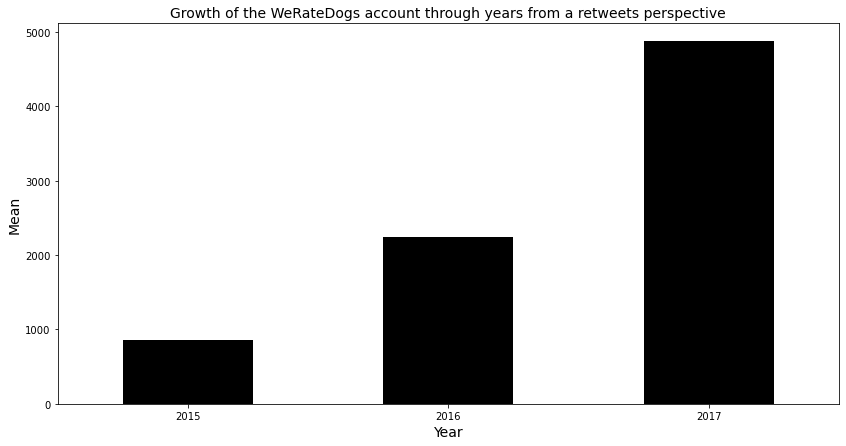

In [108]:
#groupingby data by the mean 
mean_retweets=df_complete.groupby(['year']).mean()

#selecting retweet count and plotting a bar chart
mean_retweets['retweet_count'].plot(kind='bar',figsize=(14,7),color='black')

# defining plot parameters with matplotlib
plt.xticks(rotation=0)
plt.title('Growth of the WeRateDogs account through years from a retweets perspective',fontsize='14')
plt.ylabel('Mean',fontsize='14')
plt.xlabel('Year',fontsize='14');